In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### tweet1,article1 are outputs after epoch 1 (starting epoch 0), and tweet2, article2

In [2]:
tweet1 = pd.read_csv("../outputs/tweet_ahsg-epoch-1.csv")
article1 = pd.read_csv("../outputs/article_ahsg-epoch-1.csv")

tweet2 = pd.read_csv("../outputs/tweet_ahsg-epoch-2.csv")
article2 = pd.read_csv("../outputs/article_ahsg-epoch-2.csv")

In [3]:
def evaluate_this_dataframe(df, threshold=0.5):
    print("F1 Score: ", f1_score(df.y_true.values, df.y_pred.values >= threshold, average = 'binary'))
    print("Accuracy Score: ", accuracy_score(df.y_true.values, df.y_pred.values >= threshold))

In [4]:
def evaluate_this_dataframe_and_plot(df, threshold=0.5):
    X = np.arange(0., 1.0, 0.01)
    Y_acc, Y_f1 = [], []
    for threshold in X:
        Y_f1.append(f1_score(df.y_true.values, df.y_pred.values >= threshold, average = 'binary'))
        Y_acc.append(accuracy_score(df.y_true.values, df.y_pred.values >= threshold))
    best_f1 = max(Y_f1)
    best_threshold = X[Y_f1.index(best_f1)]
    print("Best threshold value found was: ",best_threshold, "  with an f1 score of: ", best_f1)
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].plot(X,Y_f1)
    axs[0].set_ylabel("f1 score")
    axs[0].set_xlabel("Threshold value")
    axs[1].plot(X,Y_acc)
    axs[1].set_ylabel("acc score")
    axs[1].set_xlabel("Threshold value")
    plt.tight_layout()

In [5]:
evaluate_this_dataframe(tweet1)
evaluate_this_dataframe(article1)

F1 Score:  0.9921259842519685
Accuracy Score:  0.996039603960396
F1 Score:  0.9053497942386831
Accuracy Score:  0.9544554455445544


Best threshold value found was:  0.32   with an f1 score of:  0.9921259842519685
Best threshold value found was:  0.18   with an f1 score of:  0.9260700389105059


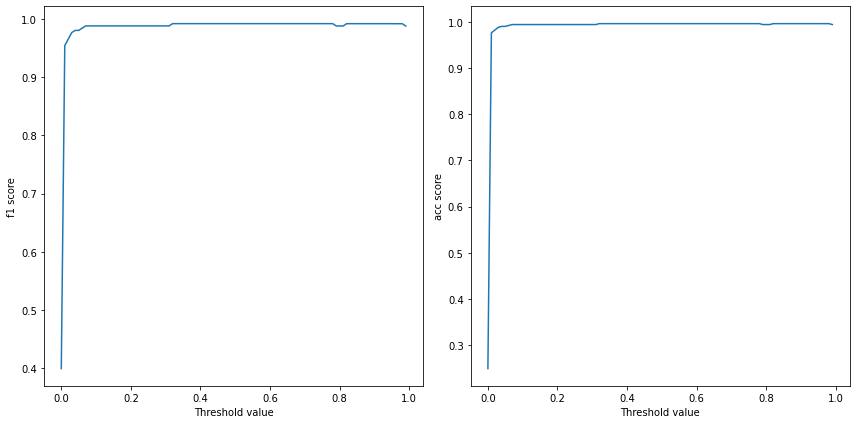

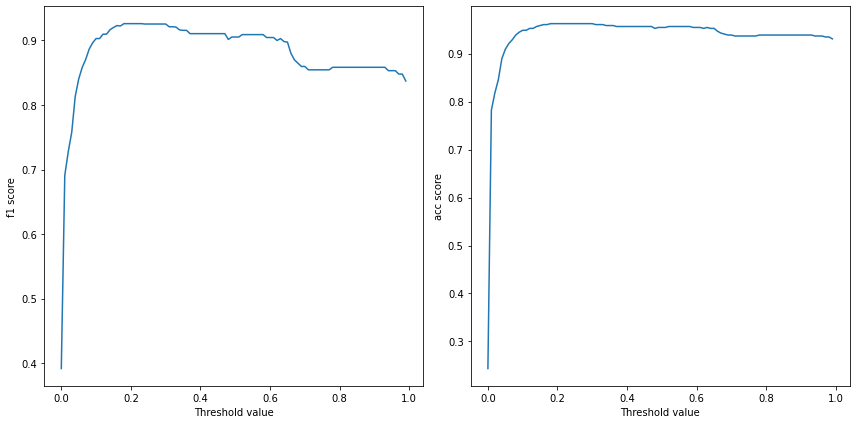

In [6]:
evaluate_this_dataframe_and_plot(tweet1)
evaluate_this_dataframe_and_plot(article1)

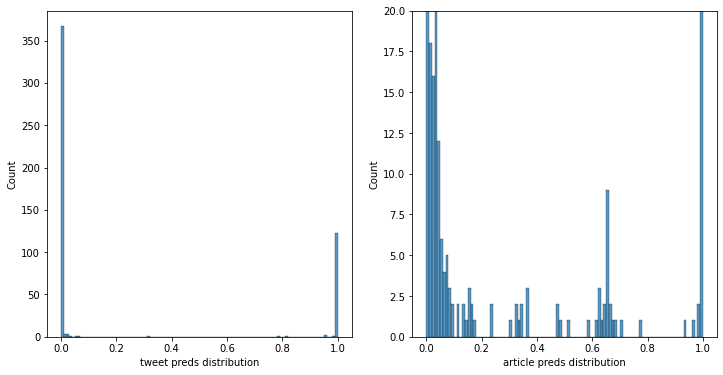

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.histplot(tweet1.y_pred.values, bins=100, ax=axs[0])
sns.histplot(article1.y_pred.values, bins=100, ax=axs[1])
axs[0].set_xlabel("tweet preds distribution")
axs[1].set_xlabel("article preds distribution")

plt.ylim(0,20);

In [8]:
evaluate_this_dataframe(tweet2)
evaluate_this_dataframe(article2)

F1 Score:  0.9921259842519685
Accuracy Score:  0.996039603960396
F1 Score:  0.9236947791164658
Accuracy Score:  0.9623762376237623


Best threshold value found was:  0.98   with an f1 score of:  1.0
Best threshold value found was:  0.2   with an f1 score of:  0.937984496124031


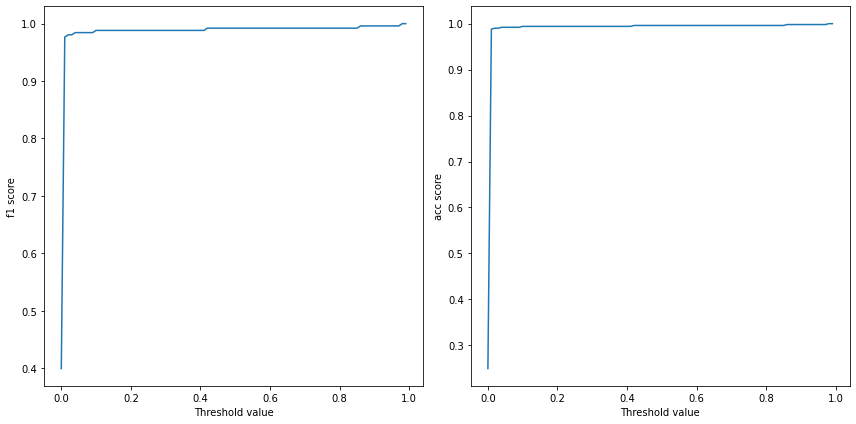

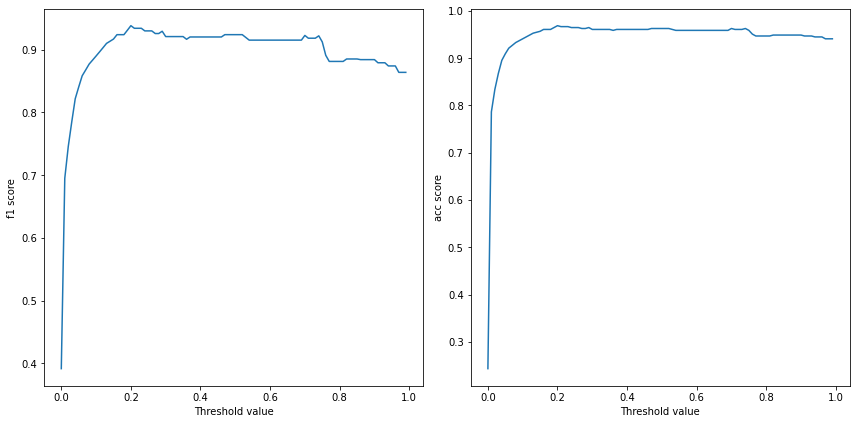

In [9]:
evaluate_this_dataframe_and_plot(tweet2)
evaluate_this_dataframe_and_plot(article2)

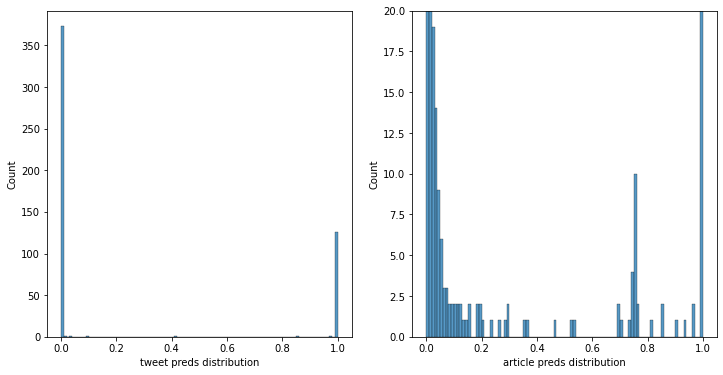

In [10]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.histplot(tweet2.y_pred.values, bins=100, ax=axs[0])
sns.histplot(article2.y_pred.values, bins=100, ax=axs[1])
axs[0].set_xlabel("tweet preds distribution")
axs[1].set_xlabel("article preds distribution")

plt.ylim(0,20);

Best threshold value found was:  0.2   with an f1 score of:  0.962962962962963


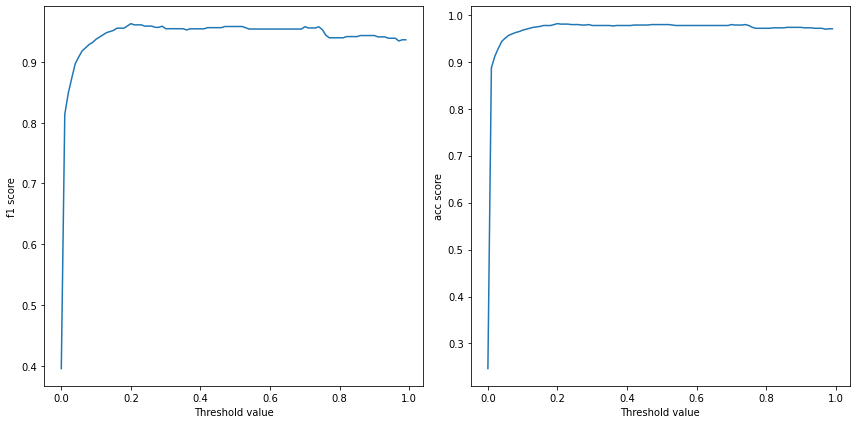

In [11]:
combined = pd.concat([tweet2, article2])
evaluate_this_dataframe_and_plot(combined)

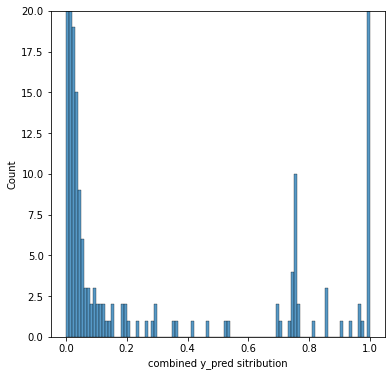

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(combined.y_pred.values, bins=100);
plt.xlabel("combined y_pred sitribution");
plt.ylim(0,20);

In [18]:
confusion_matrix(combined.y_true.values, combined.y_pred.values>0.2)

array([[744,  17],
       [  2, 247]])

In [19]:
confusion_matrix(article2.y_true.values, article2.y_pred.values>0.2)

array([[368,  14],
       [  2, 121]])

## NOTE: False Positives are the issue here

In [24]:
print(classification_report(article2.y_true.values, article2.y_pred.values>0.2))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       382
           1       0.90      0.98      0.94       123

    accuracy                           0.97       505
   macro avg       0.95      0.97      0.96       505
weighted avg       0.97      0.97      0.97       505



In [35]:
article = pd.read_pickle("../data/article_dev_cleaned.pkl")
false_preds_idx = article2.loc[(article2['y_pred']>=0.2)!=article2['y_true']].index
article.loc[:,"y_preds"] = article2.y_pred.values

In [36]:
article.loc[false_preds_idx]

,Text_ID,Text,Headline,Mobile_Tech_Flag,urls,y_preds
31,article_3983,20 Best SEO Tips For Website Rank in 2020 [For...,20 Best SEO Tips For Website Rank in 2020 [For...,0,[https://ahrefs.com/],0.285105
57,article_0564,New Delhi: Data companies are going to find ev...,Data Companies To Become More Intrusive In 202...,0,[],0.817520
61,article_2977,"15 फरवरी, 2021|7:13|IST","मुरादाबाद में बोले-सीएम योगी, किसान-मजदूर जिनक...",0,[],0.753021
129,article_2742,"25 फरवरी, 2021|9:28|IST","EPF पर मिल सकता है 8.5 फीसद ब्याज, दिसंबर के अ...",0,[],0.755103
165,article_1459,Please Enable Cookies digitalconqurer. com is ...,Nielsen To Report Fourth Quarter 2020 Results,0,[],0.468434
177,article_2371,"25 फरवरी, 2021|9:13|IST","हर महीने चाहिए 5000 रुपये पेंशन, तो इस सरकारी ...",0,[],0.758392
178,article_1567,Washing Machine On Amazon : बजट की फिक्र छोड़,"Camera On Amazon : खरीदें Canon, Nikon से लेकर...",0,[],0.363363
231,article_3755,"पटना, अरविंद शर्मा: बिहार में युवा राजनीति के ...",Exclusive interview: लालूजी ने सामाजिक न्याय क...,1,[],0.049199
238,article_3411,A strong commitment to research and innovation...,Higher education institutes welcome Budget’s f...,1,[],0.029603
242,article_2436,2 सितंबर ये 118 ऐप्स किये गए बैन APUS Launcher...,2020 में भारत सरकार ने किया स्मार्टफोन में चीन...,0,[],0.996618


In [45]:
article.loc[false_preds_idx, "Headline"].to_list()

['20 Best SEO Tips For Website Rank in 2020 [For Organic Traffic]',
 'Data Companies To Become More Intrusive In 2021: Report',
 'मुरादाबाद में बोले-सीएम योगी, किसान-मजदूर जिनके एजेंडे में नहीं रहे वही कर रहे गुमराह ',
 'EPF पर मिल सकता है 8.5 फीसद ब्याज, दिसंबर के अंत तक आएगा खातों मे',
 'Nielsen To Report Fourth Quarter 2020 Results',
 'हर महीने चाहिए 5000 रुपये पेंशन, तो इस सरकारी योजना में लगाएं पैसा',
 'Camera On Amazon : खरीदें Canon, Nikon से लेकर Sony के शानदार डिजिटल Camera, Amazon पर मिल रही शानदार छूट',
 'Exclusive interview: लालूजी ने सामाजिक न्याय किया, हम आर्थिक न्याय करेंगेः तेजस्वी',
 'Higher education institutes welcome Budget’s focus on research, internship; K12 section felt leftout',
 '2020 में भारत सरकार ने किया स्मार्टफोन में चीनी कम, बैन किये ये 267 ऐप्स',
 'लेटेस्ट\\n            पूरी दुनिया के मुकाबले भारत में घर खरीदना हुआ आसान, इतनी कम हो गई कीमतें',
 'Techno: टेक्नो ने भारत में किया 48MP Dual Selfie Camera वाला नया स्मार्टफोन लॉन्च',
 'is google pay digital pa

### False Negatives (But actually true negatives, labels are wrong)

In [47]:
for a in article.loc[[231, 238],'Text'].apply(lambda x:" ".join(x.split()[:512])).to_list():
    print(a, "\n\n\n")

पटना, अरविंद शर्मा: बिहार में युवा राजनीति के नए प्रतीक और महागठबंधन के मुख्यमंत्री का चेहरा तेजस्वी यादव इन दिनों चुनावी सभाओं में अति व्यस्त हैं। आम लोगों से मिल रहे हैं। संवाद कर रहे हैं। बिहार की तस्वीर बदलने का वादा कर रहे हैं। महागठबंधन के प्रत्याशियों की ओर से रैलियों और सभाओं के लिए सबसे ज्यादा मांग तेजस्वी की ही है। इसलिए एक-एक दिन में उन्हें 17-17 सभाएं करनी पड़ रही है। उनका पूरा दिन मंचों, सभाओं और प्रत्याशियों के बीच ही गुजरता है। प्रस्तुत है प्रमुख अंश:- 1. चुनाव में आप बहुत मेहनत कर रहे हैं तो शुरुआत इसी से करते हैं कि आपको कितनी सीटों की उम्मीद है? हमें उम्मीद ही नहीं, पूरा विश्वास है कि महागठबंधन दो तिहाई बहुमत के साथ बिहार में अगली सरकार बनाने जा रहा है। जिस तरह से आज आम लोग त्रस्त हैं, यह संख्या ऊपर जा सकती है, पर कम होती नहीं दिख रही है। 2. दस लाख नौकरियों को लेकर आम लोगों में बड़ा कन्फ्यूजन है। आप नौकरी देंगे या रोजगार? संविदा की सारी नौकरियों को भी स्थाई करने का आपने वादा किया है। पहले से जो संविदा पर हैं, उन्हें परमानेंट करने का भरोसा दिया है। कहां से और कैसे आएगा

### False Postives

In [49]:
for a in article.loc[set(false_preds_idx)- {231, 238},'Text'].apply(lambda x:" ".join(x.split()[:512])).to_list():
    print(a, "\n\n\n")

25 फरवरी, 2021|9:28|IST 



तुर्की के बाद दूसरे नंबर पर न्यूजीलैंड है, जहां मकानों की कीमत एक साल में 15. 4 प्रतिशत बढ़ी है. वहीं 13. 4 प्रतिशत बढ़ोतरी के साथ लक्जमबर्ग तीसरे स्थान पर है. प्रतीकात्मक फोटो भारत में घरों की औसत कीमत साल 2020 की तीसरी तिमाही में पिछले साल 2019 की तीसरी तिमाही के मुकाबले 2. 4 प्रतिशत गिर गई है. इसके बाद ग्लोबल होम प्राइस इंडेक्स में भारत सात पायदान फिसलकर 54वें पर आ गया है, जो 2019 की तीसरी तिमाही में 47वें स्थान पर था. इंटरनेशनल प्रॉपर्टी कंसल्टेंट नाइट फ्रैंक ने अपनी हालिया रिसर्च रिपोर्ट ‘ग्लोबल हाउस प्राइस इंडेक्स तीसरी तिमाही 2020’ में यह बात कही है. ये भी पढ़े: Amazon सेल: सिर्फ 23 हजार रुपये में मिल रहा है आईफोन का ये दमदार मॉडल, लिस्ट में आईपैड और मैकबुक भी शामिल सूचकांक (इंडेक्स) के अनुसार, पिछली तिमाही यानी वर्ष 2020 की दूसरी तिमाही की रैंकिंग से इस बार की तीसरी तिमाही की रैंकिंग में कोई बदलाव नहीं आया है। क्योंकि भारत दूसरी तिमाही में भी 56 देशों के बीच 54वें स्थान पर था. ये भी पढ़े: Post Office Savings Account के आज से बदल रहे हैं नियम, मिनिमम 

In [54]:
tweet = pd.read_pickle("../data/tweet_dev_cleaned.pkl")
tweet_false_preds_idx = tweet2.loc[(tweet2['y_pred']>=0.5)!=tweet2['y_true']].index
tweet.loc[:,"y_preds"] = tweet2.y_pred.values

In [55]:
tweet.loc[tweet_false_preds_idx]

,Tweet_ID,Tweet,Mobile_Tech_Tag,hashtags,mentions,Tweet_with_emoji_desc,y_preds
133,tweet_1917,Android हो या हो iPhone अपनी औकात है सिर्फ ban...,0,[],[@ShrishtySays],Android हो या हो iPhone अपनी औकात है सिर्फ ban...,0.974329
299,tweet_0827,#NowPlaying The Bottle by Joe Bataan! Find us ...,0,"[#NowPlaying, #Funk, #DiscoMusic, #Oldies, #70...",[],#NowPlaying The Bottle by Joe Bataan! Find us ...,0.855909


Both are False Positives

In [57]:
tweet.loc[tweet_false_preds_idx, 'Tweet_with_emoji_desc'].to_list()

['Android हो या हो iPhone अपनी औकात है सिर्फ bank loan..:beaming face with smiling eyes:',
 '#NowPlaying The Bottle by Joe Bataan! Find us at CRR App: Google Play Apple Micro-site: Web Page #Funk #DiscoMusic #Oldies #70s #DiscoNights #OldiesButGoodies']